Stand: 20.01.25 

- nur kurz zum probieren
- Patriks Github: https://github.com/sgc-kn/dashboards
    - ID Klimamessstation DWD: 02712 (https://opendata.dwd.de/climate_environment/CDC/observations_germany/) 

## 1) DWD Daten

In [38]:
import folium
import pandas as pd
from datetime import datetime
import webbrowser
from pathlib import Path

# Daten laden
data = {
    "Stations_id": [2712, 2712, 2712, 2712, 2712, 2712],
    "Stationshoehe": [400.00, 398.00, 443.00, 442.50, 442.50, 428.06],
    "Geogr.Breite": [47.6594, 47.6672, 47.6774, 47.6774, 47.6774, 47.6952],
    "Geogr.Laenge": [9.1790, 9.1798, 9.1900, 9.1900, 9.1900, 9.1307],
    "von_datum": ["19510702", "19570801", "19720918", "20070307", "20180927", "20201019"],
    "bis_datum": ["19570731", "19720917", "20070306", "20180926", "20201018", ""],
    "Stationsname": ["Konstanz"] * 6
}

df = pd.DataFrame(data)

# Datum ins deutsche Format umwandeln
def format_date(date_str):
    if date_str.strip() == "":
        return "heute"
    return datetime.strptime(date_str, "%Y%m%d").strftime("%d.%m.%Y")

# Karte erstellen, zentriert auf den Mittelwert der Koordinaten
m = folium.Map(location=[df["Geogr.Breite"].mean(), df["Geogr.Laenge"].mean()], zoom_start=13)

# DataFrame nach dem frühesten 'von_datum' sortieren
df_sorted = df.sort_values(by='von_datum')

# Gruppierung der Daten nach den Koordinaten
grouped = df_sorted.groupby(['Geogr.Breite', 'Geogr.Laenge'])

# Marker mit Tooltip, Popup und blauen Zahlen hinzufügen
counter = 1
for (lat, lon), group in grouped:
    # Popup-Text für alle Datensätze an derselben Position
    popup_text = "<br>".join([
        f"DWD<br>Von: {format_date(row['von_datum'])} - Bis: {format_date(row['bis_datum'])}" 
        for _, row in group.iterrows()
    ])
    
    popup = folium.Popup(popup_text, max_width=300, close_button=True)
    marker = folium.Marker(
        location=[lat, lon],
        tooltip=popup_text
    )
    marker.add_to(m)
    marker.add_child(popup)
    popup.show = True  # Popup von Anfang an sichtbar machen

    # Blaue Zahlen nebeneinander anzeige
    number_html = ''.join([
        f'<div style="display:inline-block; font-size: 16pt; color: blue; font-weight: bold; margin-right: 5px;">{i}</div>' 
        for i in range(counter, counter + len(group))
    ])

    folium.map.Marker(
        [lat + 0.003, lon + 0.004],
        icon=folium.DivIcon(html=number_html)
    ).add_to(m)

    counter += len(group)

# Luftgüte-Station (rote Markierung) hinzufügen
# WGS84 Koordinaten: 9°10'09.44" E, 47°39'51.70" N
luftguete_lat = 47 + 39/60 + 51.70/3600  # Umrechnung in Dezimalgrad
luftguete_lon = 9 + 10/60 + 9.44/3600    # Umrechnung in Dezimalgrad

popup_luftguete = folium.Popup("Luftgüte", max_width=300, close_button=True)
marker_luftguete = folium.Marker(
    location=[luftguete_lat, luftguete_lon],
    tooltip="Luftgüte",
    icon=folium.Icon(color='red')
)
marker_luftguete.add_to(m)
marker_luftguete.add_child(popup_luftguete)
popup_luftguete.show = True  # Popup von Anfang an sichtbar machen

# Ordner 'data' erstellen, falls nicht vorhanden
data_dir = Path.cwd() / "../data"
data_dir.mkdir(parents=True, exist_ok=True)

# Karte speichern und im Browser öffnen
map_file = data_dir / "konstanz_map.html"
m.save(map_file)

# Karte im Standardbrowser öffnen
webbrowser.open(map_file.as_uri())


True

## 2) Konstanz Sensoren

In [4]:
import pandas as pd
from pathlib import Path

In [5]:
file_path = Path("..\\data")
file_name = "data_weather_stations_2024.csv"


weather_df = pd.read_csv(file_path / file_name)

print(weather_df.shape)
print(weather_df.columns)
display(weather_df.head())

(276307, 13)
Index(['entity_id', 'name', 'dateobserved', 'atmosphericpressure',
       'precipitation', 'relativehumidity', 'temperature', 'winddirection',
       'windspeedavg', 'windspeedmax', 'windspeedmin',
       'surfacetemperaturewintersense', 'temperaturewintersense'],
      dtype='object')


,entity_id,name,dateobserved,atmosphericpressure,precipitation,relativehumidity,temperature,winddirection,windspeedavg,windspeedmax,windspeedmin,surfacetemperaturewintersense,temperaturewintersense
0,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d35...,Marktstätte,2024-12-31 23:58:54.822+01,982.5,0.22,98.2,-1.6,28,0.4,1.1,0.1,0.27,-1.6309
1,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d2f...,Herose-Park,2024-12-31 23:55:11.541+01,982.3,0.09,100.0,-1.3,203,0.6,1.0,0.1,NaN,NaN
2,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d34...,Mainaustrasse,2024-12-31 23:53:21.901+01,981.2,0.04,100.0,-1.6,232,0.2,0.3,0.0,NaN,NaN
3,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d34...,Fähre Staad,2024-12-31 23:52:12.075+01,982.0,82.60,100.0,-1.7,260,0.2,0.6,0.0,NaN,NaN
4,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d2f...,Hörnle,2024-12-31 23:51:25.294+01,981.7,0.00,100.0,-1.9,253,0.2,0.4,0.1,NaN,NaN


In [6]:
print(f"Anzahl: {len(weather_df["name"].unique())}\nNamen: {weather_df["name"].unique()}")

Anzahl: 12
Namen: ['Marktstätte' 'Herose-Park' 'Mainaustrasse' 'Fähre Staad' 'Hörnle'
 'Riedstrasse' 'Europapark' 'Stadtgarten' 'Bodanplatz' 'Friedrichstrasse'
 'Döbele' 'Stephansplatz']


C:\Users\majaf\AppData\Local\Temp\ipykernel_48300\1084512740.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  city_df.index = pd.to_datetime(city_df.index, format='ISO8601')


,entity_id,name,atmosphericpressure,precipitation,relativehumidity,temperature,winddirection,windspeedavg,windspeedmax,windspeedmin,surfacetemperaturewintersense,temperaturewintersense
dateobserved,,,,,,,,,,,,
2024-12-24 21:23:19.872000+01:00,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d51...,Stadtgarten,984.1,0.0,97.39,0.4,299,0.5,0.6,0.4,NaN,NaN
2024-12-24 21:08:20.131000+01:00,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d51...,Stadtgarten,984.1,0.0,96.89,0.4,310,0.3,0.4,0.2,NaN,NaN
2024-12-24 20:53:20.317000+01:00,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d51...,Stadtgarten,984.1,0.0,96.50,0.5,335,0.5,0.7,0.4,NaN,NaN
2024-12-24 20:38:20.535000+01:00,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d51...,Stadtgarten,983.8,0.0,97.10,0.6,348,0.6,0.8,0.5,NaN,NaN
2024-12-24 20:23:20.765000+01:00,urn:ngsi-ld:WeatherObserved:eui-8cf95720000d51...,Stadtgarten,983.5,0.0,96.39,0.7,2,0.3,0.5,0.2,NaN,NaN


<Axes: xlabel='dateobserved'>

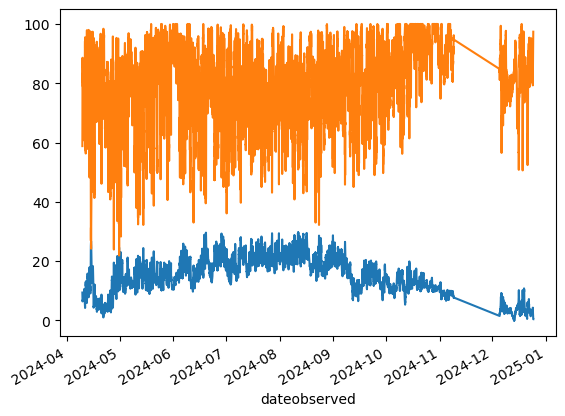

In [7]:
city_df = weather_df[weather_df["name"] == "Stadtgarten"].set_index("dateobserved").copy()
city_df.index = pd.to_datetime(city_df.index, format='ISO8601')
#city_df.index = city_df.index.tz_convert("UTC") 

display(city_df.head())
city_df["temperature"].plot()
city_df["relativehumidity"].plot()